# Assignment 2:

In [275]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 't')

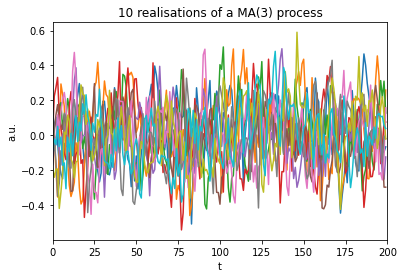

In [284]:
# Parameters:
order = 3
numRealisations = 10
numObservations = 200

# Make 
MAProcess = ArmaProcess([1], np.ones(order))
realisations = []
for r in range(numRealisations):
    simulation = MAProcess.generate_sample(nsample= 200, scale= 0.1)
    realisations.append(simulation)
    plt.plot(simulation)

plt.xlim(0, 200)
plt.title(f"{numRealisations} realisations of a MA({order}) process")
plt.ylabel("a.u.")
plt.xlabel("t")


### Second order moment representation:

In [277]:
EX = np.mean(realisations[0])
print(EX)

VarX = np.nanvar(realisations[0])
print(VarX)

CorrX = np.corrcoef(realisations[0], realisations[0])
print(CorrX)

0.02480365808275926
0.036605882448262836
[[1. 1.]
 [1. 1.]]


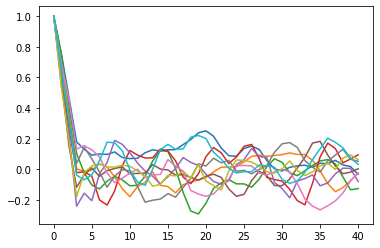

In [278]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig = plt.figure()
for r in realisations:
    autoCorr, qStat,_ = acf(r, qstat= True)
    plt.plot(autoCorr)


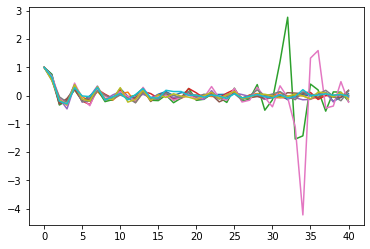

In [279]:
warnings.simplefilter(action='ignore', category=RuntimeWarning)

fig = plt.figure()
for r in realisations:
    partialAutoCorr = pacf(r)
    plt.plot(partialAutoCorr)

In [282]:
for r in range(len(realisations)):
    print(f"The variance for realisation {r + 1} is {round(np.nanvar(realisations[r]), 4)}")

The variance for realisation 1 is 0.0366
The variance for realisation 2 is 0.0282
The variance for realisation 3 is 0.0347
The variance for realisation 4 is 0.0283
The variance for realisation 5 is 0.0241
The variance for realisation 6 is 0.0259
The variance for realisation 7 is 0.0381
The variance for realisation 8 is 0.0305
The variance for realisation 9 is 0.0258
The variance for realisation 10 is 0.0273
